# CO543 - Image Processing - Lab 01

- E/21/245 - MADHUSHAN S.K.A.K.

## Task 1 — View the Image as an Array of Numbers


In [ ]:
# %pip install opencv-python

In [62]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from google.colab.patches import cv2_imshow

By cv2_imshow() transfrom BGR->RGB

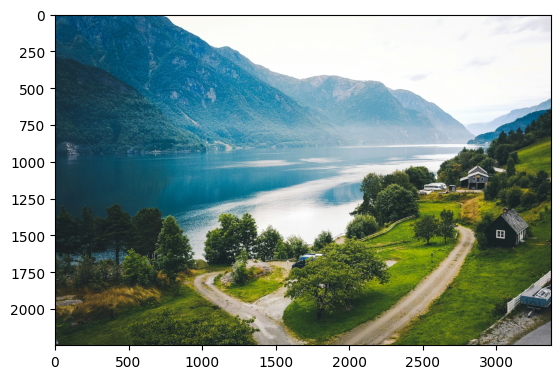

In [18]:
# open the image
img = cv2.imread('image1.jpg')
plt.imshow(img[:,:,::-1])

Check the image size 1st

In [19]:
img.shape

(2247, 3370, 3)

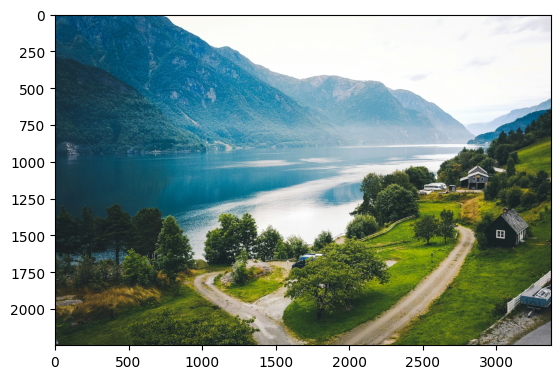

In [23]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [24]:
small_patch = img[100:105, 100:105]
small_patch

array([[[ 84,  55,   0],
        [ 92,  63,   0],
        [ 92,  63,   0],
        [ 88,  59,   0],
        [101,  69,   3]],

       [[ 93,  64,   0],
        [100,  71,   4],
        [ 96,  67,   0],
        [ 92,  63,   0],
        [ 93,  63,   0]],

       [[104,  73,   4],
        [105,  74,   5],
        [ 93,  61,   0],
        [ 89,  57,   0],
        [ 91,  61,   0]],

       [[104,  73,   4],
        [109,  78,   9],
        [ 99,  66,   0],
        [ 95,  64,   0],
        [ 97,  65,   0]],

       [[103,  71,   0],
        [110,  78,   7],
        [111,  77,   7],
        [ 99,  67,   0],
        [101,  68,   0]]], dtype=uint8)

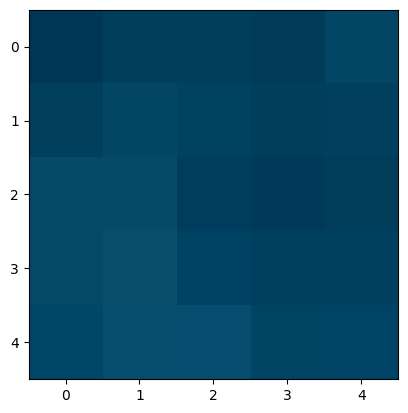

In [25]:
plt.imshow(cv2.cvtColor(small_patch,cv2.COLOR_BGR2RGB))

In [27]:
# # to see the small patch image use Nearest Neighbor Interpolation
# large_patch = cv2.resize(small_patch,(200,200), interpolation=cv2.INTER_NEAREST)
# plt.imshow(cv2.cvtColor(large_patch,cv2.COLOR_BGR2RGB))

1. `Observation & ReasoningRelating`
-  Values to Visuals: The pixel values change gradually (e.g., 84 $\rightarrow$ 92 $\rightarrow$ 101) rather than sharply, which indicates a **smooth gradient or shading** in the image rather than a hard edge. The near-zero values in the third column show that one color channel (likely Blue) is almost absent in this patch.
- Why Computers Need This: Computers cannot cognitively "see" shapes or objects. They need this grid of numbers to perform mathematical operations required for processing tasks like filtering, brightening, or recognition.

2. More to think:
If two very different images share similar numeric ranges, why do they still look different?

- Because image content is defined by spatial arrangement, not just pixel intensity. Even if the set of numbers (histogram) is identical, the specific positions of those numbers create the structure, shapes, and textures we perceive.

## Task 2 — Convert to Grayscale and Inspect Structure

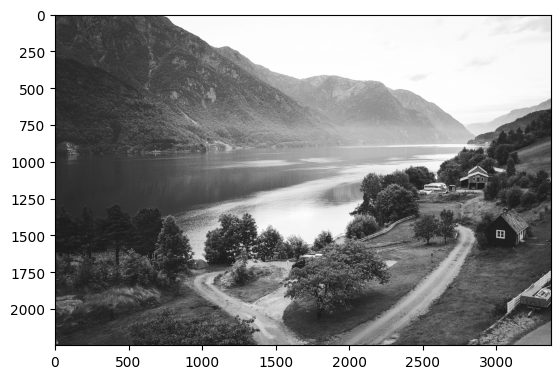

In [29]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

In [30]:
small_gray_patch = gray_img[100:105, 100:105]
small_gray_patch

array([[42, 47, 47, 45, 53],
       [48, 54, 50, 47, 48],
       [56, 57, 46, 44, 46],
       [56, 61, 50, 48, 49],
       [53, 60, 60, 51, 51]], dtype=uint8)

1. `Observation & Reasoning Relating`
- Pixel Region Inspection:
  - Observed Values: The pixel values in the inspected $5 \times 5$ region range from 42 to 61.
  - Interpretation: Since these values are relatively low (closer to 0 than 255), this region represents a dark or shadowed area of the image. The data is now a 2D matrix representing light intensity only, without color channels
- Lost vs. Preserved:
  - Lost: Chrominance (Color Information). All RGB color data is removed; we can no longer distinguish if an object was red, green, or blue.
  - Preserved: Luminance (Brightness) and Structure. The geometric shapes, edges, textures, and contrast of the image remain intact. This is sufficient for identifying what objects are present (e.g., a car, a face)
- Why we use Grayscale:
  - Efficiency: It reduces the data volume by 66% (1 channel instead of 3), making processing significantly faster.
  - Simplicity: Many algorithms (like edge detection) rely on light intensity changes (gradients). Color often adds unnecessary noise and complexity to these calculations.

2. More to think:
If grayscale simplifies computation, why don’t we always use grayscale in modern vision
systems?

- Distinguishability: Objects with similar brightness but different colors (as an example a Red light vs. Green light or a Red apple vs. Green apple) look identical in grayscale. Color is required to tell them apart.

- Contextual Features: Color provides critical features for classification tasks, such as skin detection, identifying road signs, or medical diagnosis (examples like identifying cell anomalies).

## Task 3 — Resize and Zoom to Study Resolution Effects

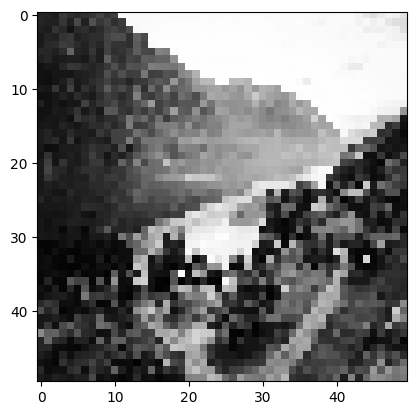

In [33]:
small = cv2.resize(gray_img, (50,50))
plt.imshow(small, cmap='gray')

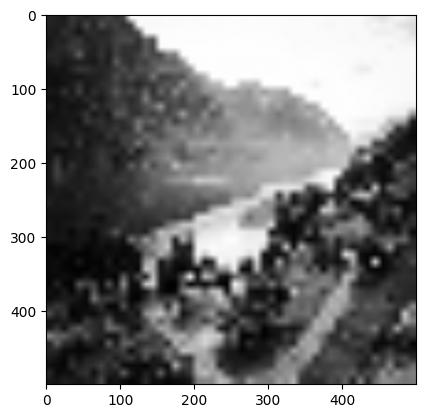

In [35]:
big = cv2.resize(small, (500,500))
plt.imshow(big, cmap='gray')

1. `Observation & Discussion`
  - Visual Details Lost:- When downscaling, high-frequency details (fine edges, textures) are permanently lost due to pixel averaging.
  - Emergence of Blur:- When upscaling back, the software uses Interpolation (estimating missing pixels based on neighbors). This estimation cannot recover the original data, resulting in a blurry image (if Bilinear interpolation is used) or pixelated edges (if Nearest Neighbor is used)
  - Effect on Processing:- Reducing resolution destroys edge information, making it harder for algorithms to detect boundaries accurately

2. More to think:
Can reduction of resolution ever help image processing tasks? (Hint: noise vs structure)

Yes, reducing resolution is often used as a preprocessing step for two main reasons:
- Noise Reduction (Noise vs. Structure): Downscaling involves averaging adjacent pixels (e.g., using cv2.INTER_AREA). This averaging process acts as a "low-pass filter," which smooths out high-frequency noise (random graininess or speckles) while preserving the global structure (shapes and large objects) of the image.

- Computational Efficiency: Processing a smaller image requires significantly less memory and CPU power. For tasks like detecting a large object (e.g., a car or a face), fine details are unnecessary. Lower resolution allows algorithms to run in real-time without sacrificing accuracy on the main structure.

## Task 4 — Crop to Focus on Meaningful Regions


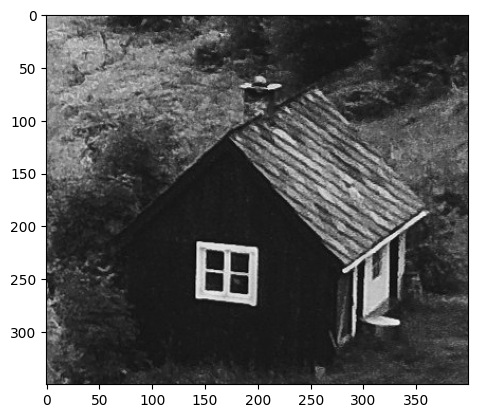

In [36]:
crop_img = gray_img[1250:1600,2850:3250]
plt.imshow(crop_img, cmap='gray')

1. `Observation & Discussion`
- How Cropping Isolates Regions of Interest: Cropping removes irrelevant background noise and focuses computational resources solely on the specific object (Region of Interest - ROI)

- Context vs. Isolated Detail: However, cropping removes 'Spatial Context' the relationship between objects. For example, a crop of a person’s shouting face shows emotion (Detail), but the whole scene reveals why they are shouting, perhaps at a sports match or in an argument (Context).

- Face vs. Whole-Scene Example:

     - Face Crops: Essential for Face Recognition (Identifying 'Who is this?'). High detail is priority.

     - Whole-Scene: Essential for Activity Recognition (Understanding 'What is happening?'). Context is priority.

2. More to Think: Can cropping remove crucial context?

- Cropping is helpful only if we already know where to look or if the object acts independently. It hurts recognition when the object's meaning depends on its surroundings.

## Task 5 — Flip and Rotate to Explore Viewpoint Changes

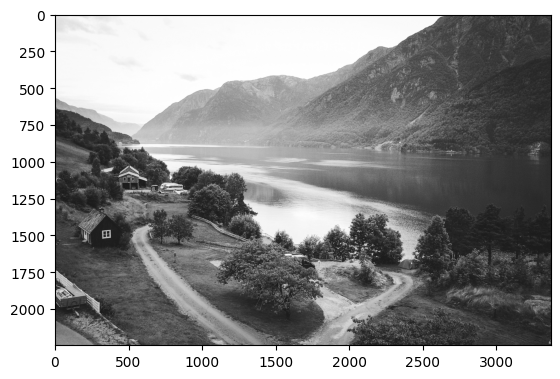

In [ ]:
# Flip Horizontal 
flip_h = cv2.flip(gray_img, 1)
plt.imshow(flip_h,cmap='gray')

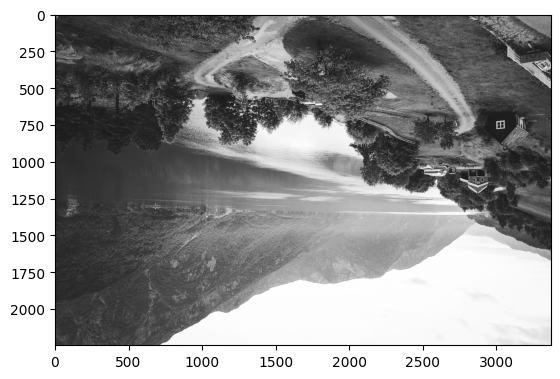

In [ ]:
# Flip verical
flip_v = cv2.flip(gray_img, 0)
plt.imshow(flip_v,cmap='gray')

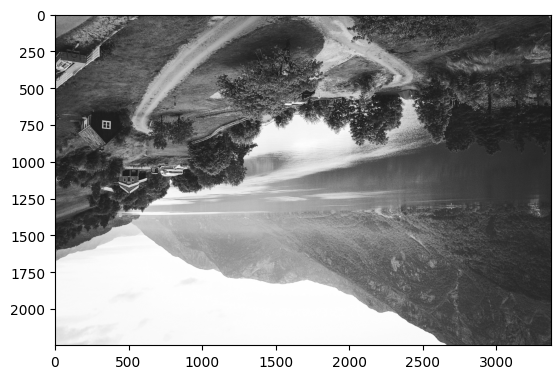

In [46]:
# verical and horizotal
flip = cv2.flip(gray_img,-1)
plt.imshow(flip,cmap='gray')

In [48]:
h,w = gray_img.shape[:2]
print(h,w)

2247 3370


In [49]:
# finding the center points
cx, cy = w // 2, h // 2
print(cx,cy)

1685 1123


$$M = \begin{bmatrix} 
\mathbf{a} & \mathbf{b} & t_x \\ 
\mathbf{c} & \mathbf{d} & t_y 
\end{bmatrix}$$

- $a$ & $d$: draw in Scale , $b$ & $c$: Shear the image.
- $t_x$ = $x$ distance , $t_y$ = $y$ distance

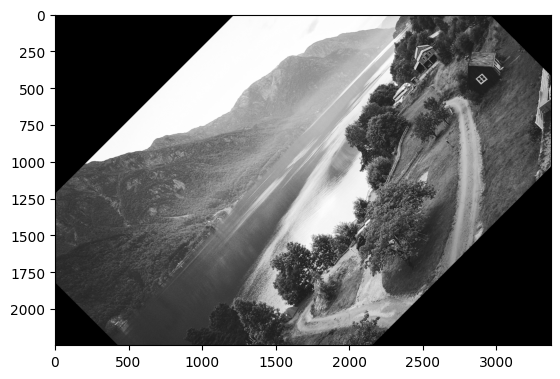

In [ ]:




# Rotate with the center of the image
M = cv2.getRotationMatrix2D(center=(cx,cy), angle=45, scale=1.0) 
rotated_img = cv2.warpAffine(gray_img, M, (w,h))
plt.imshow(rotated_img, cmap='gray')
plt.show()

Try to see different kind of image changes

In [52]:
# a=1.5, d =1.0 (changing the width of the photo)
M_scale = np.float32([
    [1.5, 0 , 0],
    [0, 1.0 , 0]
])

In [53]:
# b = 0.5 (for the shear in the x direcion , not scalling )
M_shear_x = np.float32([
    [1,   0.5, 0],   # a=1, b=0.5 
    [0,   1,   0]    # c=0, d=1
])

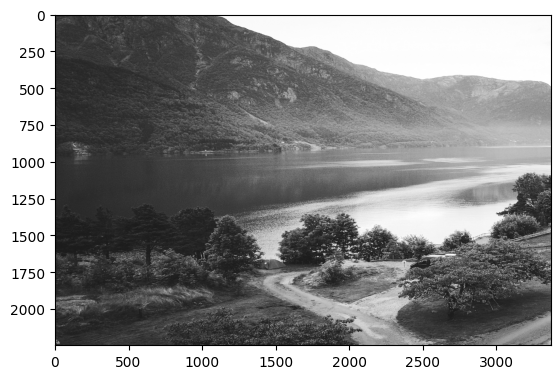

In [54]:
scaled_img = cv2.warpAffine(gray_img, M_scale, (w,h))
plt.imshow(scaled_img, cmap='gray')

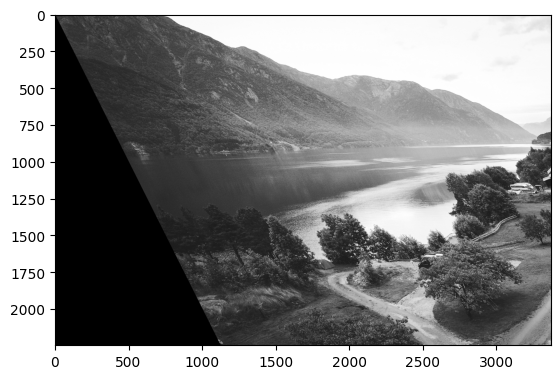

In [55]:
shered_img = cv2.warpAffine(gray_img, M_shear_x, (w,h))
plt.imshow(shered_img, cmap='gray')

1. `Observation`:
- Horizontal Flip:- The image was flipped across the y-axis (mirror effect). For most natural objects like faces or vehicles, the visual meaning remains unchanged.
- Vertical Flip:- "The image was flipped upside down. This transformation often distorts the interpretation of natural scenes (like sky at the bottom) where gravity defines orientation.
- Rotation simulates tilting the camera. While parts of the image may be cropped (if the canvas size isn't adjusted), the central object usually remains recognizable.

2. `Discussion - viewpoint & data augmentation`
- Real Camera Motion:- In real-world scenarios, cameras are rarely perfectly aligned. Rotations simulate camera tilt (roll), and flips can simulate mirror reflections. By applying **cv2.warpAffine** and **cv2.flip**, we mathematically simulate these physical viewpoint changes."
- Data Augmentation:- These transformations are crucial for Data Augmentation in Deep Learning. By generating flipped and rotated versions of a single training image, we can multiply the dataset size and teach the model to recognize objects regardless of their orientation (Invariant).

3. More to think: 
Should a recognition model treat flipped objects as the same or different? 
- It depends on the domain

    - Case A (Treat as Same):- For general object recognition (like  a cup or a cat), orientation does not change identity. A flipped cat is still a cat. Here, the model should be invariant to flipping.

    - Case B (Treat as Different):- For text recognition (OCR) or traffic signs, orientation defines meaning. A digit '6' becomes '9' when rotated 180 degrees. An arrow pointing 'Left' means the opposite if flipped horizontally. Here, the model must be sensitive to orientation.

## Task 6 — Invert Pixel Intensities (Negative Image)

In [58]:
inverted_img = cv2.bitwise_not(gray_img)

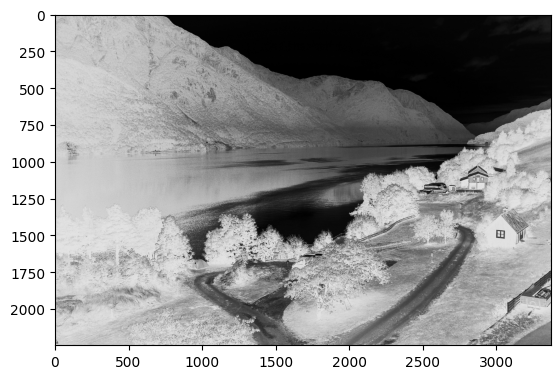

In [61]:
plt.imshow(inverted_img, cmap='gray')

1. `Observation & Discussion`
- Interpretation of Why Inversion Disrupts Meaning
     - Loss of Depth Perception:- Human vision relies on light and shadow to interpret 3D shapes. Inversion flips these cues (shadows become bright), flattening the image and confusing depth perception.

     - Unnatural Features:- Familiar objects become unrecognizable or "eerie" because naturally bright features (like eyes and teeth in a face) become dark, violating our mental models of how these objects look.
- Beneficial Use Cases 
    - Medical Imaging: Enhances details in X-rays and mammograms, making it easier to spot low-contrast fractures or tissues that might be missed in the original view.

    - Forensics: helps visualize fingerprints or latent details on documents by flipping the background contrast, making faint patterns stand out.

    - Astronomy: Used to visualize faint stars or nebulae against the sky (black dots on white are often easier to analyze than white dots on black).

2. More to think - Could inversion ever reveal patterns that the human eye misses?
- Yes. The human eye is sometimes more sensitive to bright details on a dark background (or vice versa depending on the context). Inversion acts as a basic form of contrast enhancement, allowing us to notice subtle textures or faint lines that were previously overpowered by the background intensity.

## Task 7 — Convert Digit CSV to Images

In [65]:
df = pd.read_csv("Digits_Lab_01.csv")
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
data = df.to_numpy()
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(19, 784))

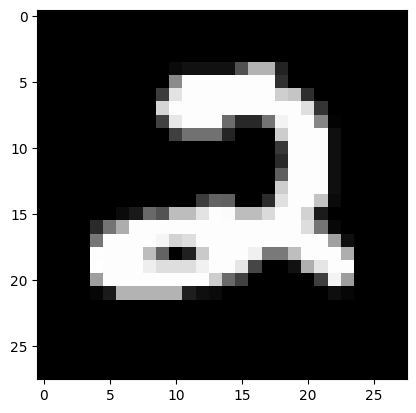

In [68]:
row_0 = data[0]
digital_image = row_0.reshape(28,28)
plt.imshow(digital_image , cmap='gray')

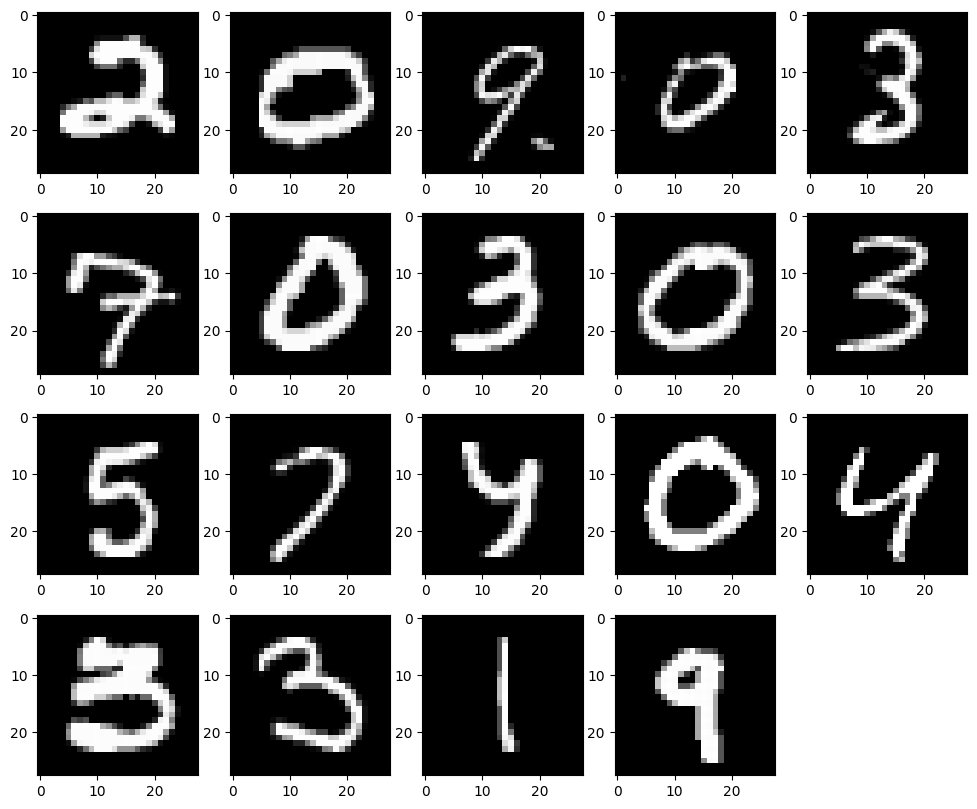

In [69]:
num_of_imgs= len(data)
plt.figure(figsize=(12,10))

for i in range(num_of_imgs):
    image_to_show = data[i].reshape(28,28)
    plt.subplot(4,5,i+1)
    plt.imshow(image_to_show,cmap='gray')

1. `Observation & Discussion`
- How a numeric table becomes a meaningful shape:- A digital image is stored as a sequence of pixel intensity values (0-255). In the CSV, the 2D grid of pixels ($28 \times 28$) is 'flattened' into a single 1D row of 784 numbers. To reconstruct the image, we reverse this process by mapping the linear sequence back into a 2D grid, breaking the line every 28 pixels to form a new row.
- Why Machine Learning depends on correct reshaping:- Spatial relationships are critical. In an image, a pixel is related to its neighbors (up, down, left, right) to form edges and curves. If we reshape incorrectly (e.g., to $26 \times 30$ instead of $28 \times 28$), the pixels will not align vertically. This destroys the local patterns (structure), making it impossible for models like CNNs to recognize the digit.

2.More to Think:- If shuffled row order still shows recognisable digits when reshaped, what does that imply about spatial encoding?
- This implies that the Spatial Encoding is contained entirely within the row (feature vector), independent of other rows. The structure of the digit depends on the fixed order of columns (pixel sequence $0$ to $783$). As long as the column order is preserved, shuffling the dataset (rows) does not affect the spatial integrity of individual images."

## Task 8 — Apply a Simple Affine Transform

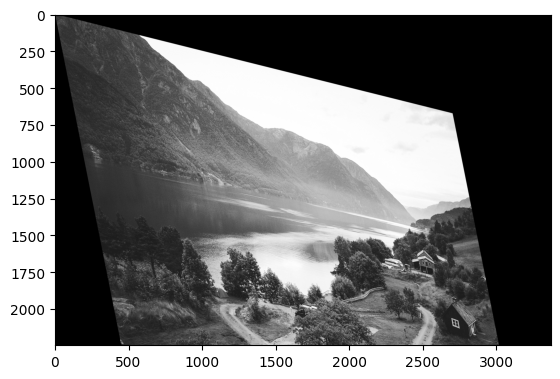

In [70]:
pts1 = np.float32([[0,0],[100,0],[0,100]]) 
pts2 = np.float32([[0,0],[80,20],[20,100]]) 
M = cv2.getAffineTransform(pts1, pts2) 
aff = cv2.warpAffine(gray_img, M, (w,h))
plt.imshow(aff,cmap='gray')

1. `Observation & Discussion`
- distortions affect object shapes:-Affine transformations maintain 'parallelism'. This means parallel lines in the original image remain parallel after transformation. However, rectangles (like buildings or windows) get distorted into parallelograms (sheared shapes). Angles between lines are not preserved
- Relation to Camera Perspective:- Shearing and shifting simulate looking at a flat object from an angle (side view) or when the camera is moving rapidly (motion blur effect). It mimics the geometric distortion seen when the camera plane is not perfectly parallel to the object plane.

2. More to think - Would a classifier trained on undistorted images recognize sheared versions?

- Likely No (or Accuracy will drop).

    - Reason: Standard classifiers (like basic CNNs) learn features based on specific spatial patterns (shapes/edges). A sheared object has different angles and pixel arrangements than the original. Therefore, a model trained only on straight images will likely fail to recognize the sheared version because the 'feature map' doesn't match what it learned.

    - Solution: This is why Data Augmentation (training with intentionally sheared/rotated images) is essential to make the model robust.

## Final Reflection

Viewing images as numeric matrices fundamentally shifts one's perception from seeing 'pictures' of objects to seeing purely mathematical grids of intensity values, where visual beauty is reduced to patterns of numbers between 0 and 255. This perspective reveals that computers do not 'see' a face or a landscape; they only process spatial relationships and pixel magnitudes through mathematical operations. The transformation that taught me the most was Task 7 (Reshaping the CSV data). It vividly demonstrated that a computer treats an image as a linear stream of raw data without inherent shape; the visual 'structure' we recognize only emerges when we explicitly define the dimensions ($28 \times 28$). This proved that machines rely entirely on defined structural rules to interpret data, completely blind to the semantic 'meaning' that human eyes instinctively construct.

### E/21/245
### Madhushan S.K.A.K.